Voter Turnout

# Reading in the Data

We first load in the full Voter Turnout dataset from IDEA VT. You can download this dataset from http://www.idea.int/vt/viewdata.cfm

In [1]:
import pandas as pd

df = pd.read_csv('~/Google Drive/Datasets/Voter_Turnout_IDEA_VT.csv')

df.head()

,country,eltype,year,vt,vote,reg,vapvt,vap,pop,invot,fhav,fhpr,fhcl,comp
0,Afghanistan,Parliamentary,2005,49.37,6406615,12977336,51.71,12389532,26334702,5.10,5.0,5,5,No
1,Afghanistan,Parliamentary,2010,45.83,4216594,9200000,29.71,14191908,29120727,4.42,6.0,6,6,No
2,Afghanistan,Presidential,2004,83.66,8128940,9716413,67.54,12035602,25697635,1.28,5.5,5,6,No
3,Afghanistan,Presidential,2009,38.80,4823090,12430644,35.06,13757508,28483631,4.67,5.5,5,6,No
4,Afghanistan,Presidential,2014,38.90,8109493,20845988,50.03,16208255,31822848,1.68,6.0,6,6,No


The codebook gives us some additional information about the variables. The following variable explanations will help us to make sense of the data.

vt: Represents voter turnout, given in percentages. Total vote / Registration 

vote: Total vote, total number of voters

reg: registration, the number of people who were registered for elections

vapvt: Voting age population (VAP) turnout statistics: total vote / estimated voting age population

vap: Voting age population - an estimate of the total number of potential voters of voting age
    Note: in some countries, the number of registered voters is higher than the number of VAP.
    
pop: population

invot: invalid votes, includes blank votes

fhav: Freedom house indicator, an average of scores assigned on Political Rights and Civil Liberties dimensions.

fhpr: Freedom house -- Political rights - from 1 (free) to 7 (not free)

fhcl: Freedom ouse -- Civil liberties

comp: Provides data on whether a country mandates compulsory voting through legislation.


I'm not a huge fan of the names of these variables, so I'm going to go ahead and rename some of them. 

In [15]:
df.columns = ['Country', 'Election Type', 'Year', 'Voter Turnout', 'Total Vote', 'Registered', 
              'Voting Age Population Turnout Percent', 'Voting Age Population',
             'Population', 'Invalid Votes', 'Freedom House Indicator', 'Fredom House Indicator: Political Rights',
             'Freedom House Indicator: Civil Liberties', 'Compulsory Voting Mandate']

Great! Now, let's start asking some questions

# Data Exploration

In [16]:
len(df.Country.value_counts()) #number of countries

199

In [17]:
df.describe()

,Year,Voter Turnout,Total Vote,Registered,Voting Age Population Turnout Percent,Voting Age Population,Population,Invalid Votes,Freedom House Indicator,Fredom House Indicator: Political Rights,Freedom House Indicator: Civil Liberties
count,2771.000000,2590.000000,2.696000e+03,2.606000e+03,2654.000000,2.717000e+03,2.730000e+03,2027.000000,2215.000000,2119.000000,2119.000000
mean,1990.314688,70.710950,1.051824e+07,1.569332e+07,63.095976,1.695398e+07,2.679167e+07,3.493823,2.738600,2.794243,2.905616
std,18.888898,16.696889,2.857775e+07,4.525097e+07,19.961099,4.601507e+07,7.427846e+07,4.288693,1.768967,1.884820,1.631709
min,1945.000000,2.730000,8.800000e+02,2.443000e+03,2.140000,2.664000e+03,4.239000e+03,0.000000,0.000000,1.000000,1.000000
25%,1978.000000,59.990000,6.459205e+05,1.028412e+06,49.877500,1.153810e+06,2.013830e+06,1.020000,1.000000,1.000000,1.000000
50%,1995.000000,72.885000,2.321117e+06,3.853336e+06,65.325000,4.029365e+06,6.799500e+06,2.100000,2.500000,2.000000,3.000000
75%,2006.000000,83.610000,7.527512e+06,1.092451e+07,77.750000,1.210517e+07,2.138825e+07,4.300000,4.000000,4.000000,4.000000
max,2015.000000,102.620000,5.538018e+08,8.341015e+08,223.700000,7.878603e+08,1.236345e+09,44.400000,7.000000,7.000000,7.000000


In [18]:
df['Election Type'].value_counts()

Parliamentary    1932
Presidential      692
EU Parliament     147
dtype: int64

In [19]:
print(min(df.Year), max(df.Year)) #Year range 

1945 2015


In [20]:
#Getting stuff ready for nice visualizations

import matplotlib.pyplot as plt
import brewer2mpl



# Set up some better defaults for matplotlib
from matplotlib import rcParams

#colorbrewer2 Dark2 qualitative color table
dark2_colors = brewer2mpl.get_map('Dark2', 'Qualitative', 7).mpl_colors

rcParams['figure.figsize'] = (14, 10)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'


def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks

    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)

    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')

    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()



In [11]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f636320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11003ef28>]], dtype=object)

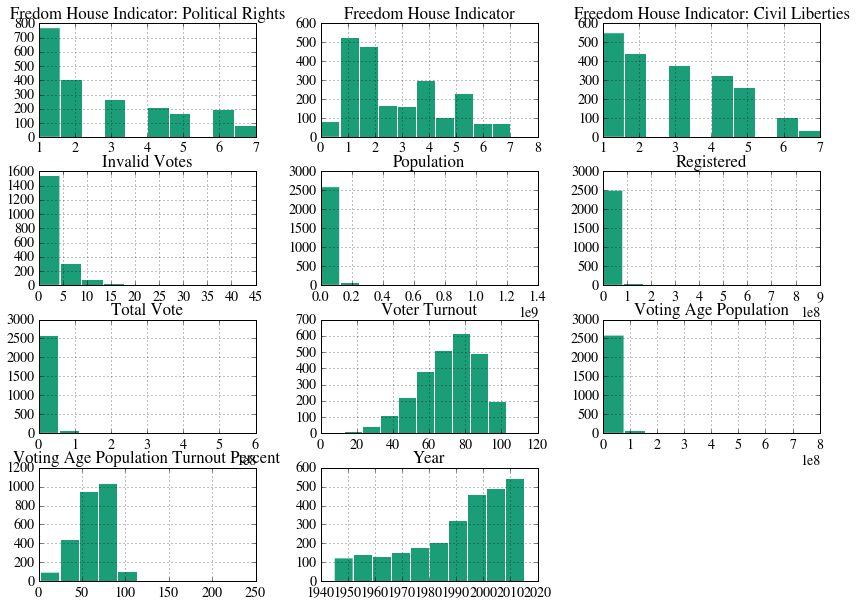

In [27]:
df.hist()



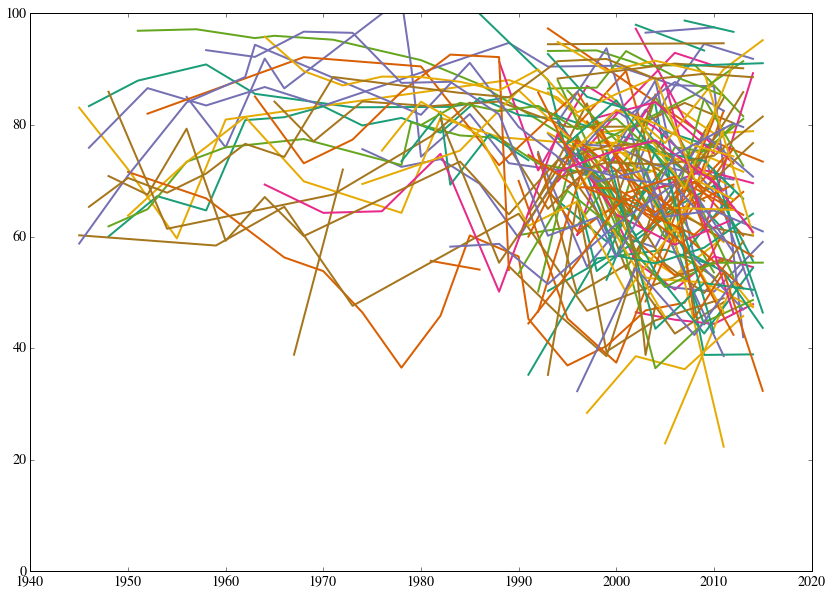

In [58]:
plt.figure()
plt.ylim([0,100])

country_group = df.groupby('Country')
country_group.size()

#Just presidential elections for now

for country in df.Country.unique():
    country_df = df.ix[df.Country == country,]
    country_df = country_df.ix[country_df['Election Type'] == 'Presidential']
    country_df = country_df.sort('Year')

    plt.plot(country_df.Year, country_df['Voter Turnout'])

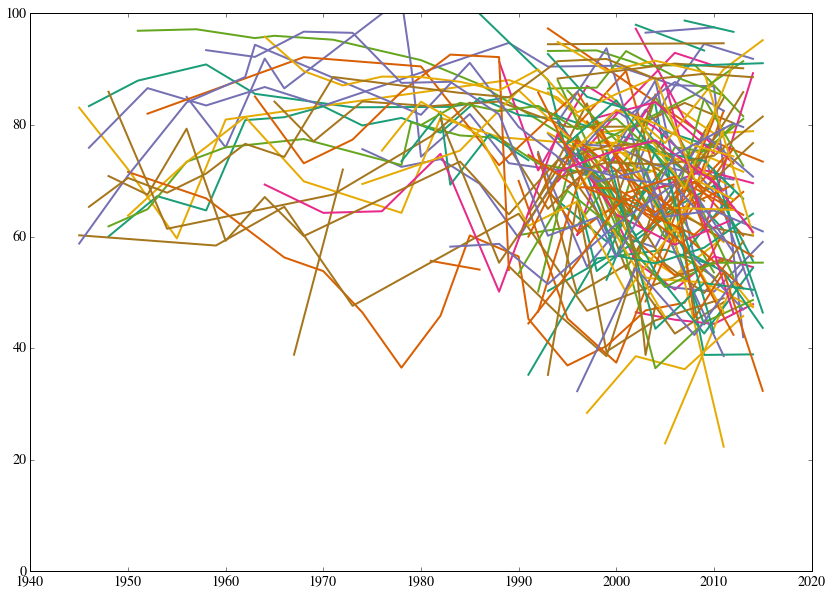

In [59]:
#and now just the parliamentary elections

plt.figure()
plt.ylim([0,100])



#Just presidential elections for now

for country in df.Country.unique():
    country_df = df.ix[df.Country == country,]
    country_df = country_df.ix[country_df['Election Type'] == 'Presidential']
    country_df = country_df.sort('Year')

    plt.plot(country_df.Year, country_df['Voter Turnout'])

In [48]:
df.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'Colombia', 'Comoros',
       'Congo, Democratic Republic of', 'Cook Islands', 'Costa Rica',
       "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic',
       'East Timor', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Estonia', 'Ethiopia', 'Faroe Islands', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Gibraltar', 'Gr

In [ ]:
#calculate world average